<div align="center">
    <h2>Υπολογιστική Γεωμετρία (Εργασία) - Διάγραμμα Voronoi & Τριγωνοποίηση Delaynay</h2>
</div>

Σε αυτό το notebook θα ασχοληθούμε με το τρίτο μέρος της εργασίας το οποίο αφορά το **Διάγραμμα Voronoi και την Τριγωνοποίηση Delaunay**. Συγκεκριμένα θα χρησιμοποιήσουμε τη βοβλιοθήκη **Scipy** για την εύρεση του διαγράμματος Voronoi και της τριγωνοποίησης Delaunay ενός συνόλου από σημεία στο επίπεδο. 

Αρχικά θα ορίσουμε τη γενική κλάση του σημείου στο επίπεδο.

In [134]:
class Vector2D:
  def __init__(self, x: float, y: float):
    self.x = x
    self.y = y

  def __repr__(self):
    return f"({self.x:.2f}, {self.y:.2f})"

Αμέσως μετά θα ορίσουμε ένα σύνολο από **100 σημεία** στο επίπεδο για τα οποία στη συνέχεια θα βρούμε το **διάγραμμα Voronoi** και την **τριγωνοποίηση Delaynay**.

In [135]:
import numpy as np

# Create a set of 150 random points
P = np.array([Vector2D(np.random.uniform(0, 100), np.random.uniform(0, 100)) for _ in range(100)])

Χρησιμοποιώντας τη βιβλιοθήκη **Scipy** της Python βρίσκουμε και οπτικοποιούμε το διάγραμμα Voronoi και την τριγωνοποίηση Delaunay του παραπάνω συνόλου σημείων.

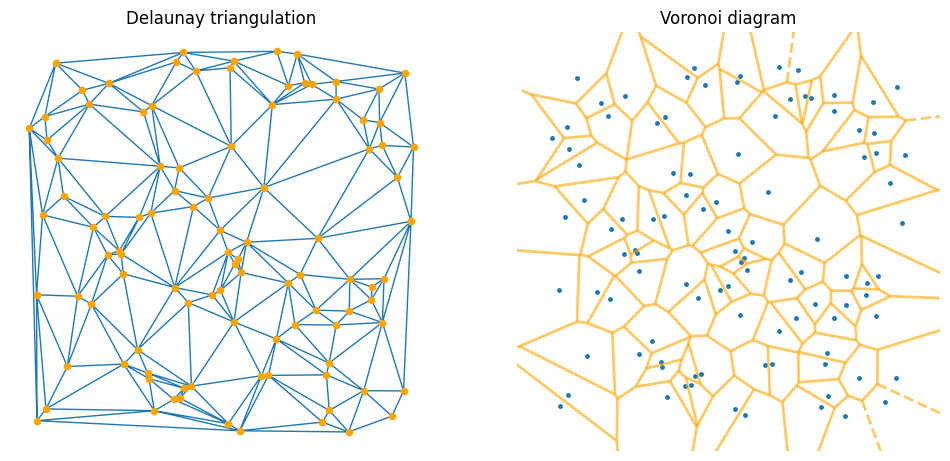

In [142]:
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay, Voronoi, voronoi_plot_2d

# Get the delaunay triangulation and the voronoi diagram of the points
tri = Delaunay([[p.x, p.y] for p in P])
vor = Voronoi([[p.x, p.y] for p in P])

# Plot the triangulation
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].triplot([p.x for p in P], [p.y for p in P], tri.simplices, linewidth=1)
axes[0].scatter([p.x for p in P], [p.y for p in P], color='orange', s=20)
axes[0].axis('off')
axes[0].set_aspect('equal')
axes[0].set_title('Delaunay triangulation')

voronoi_plot_2d(vor, ax=axes[1], show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=5)
axes[1].axis('off')
axes[1].set_aspect('equal')
axes[1].set_title('Voronoi diagram')

plt.show()

Η **τριγωνοποίηση Delaunay** του συνόλου σημείων στο επίπεδο αποτελεί το **δυϊκό γράφο** του **διαγράμματος Voronoi** των σημείων αυτών (εστίες). Συγκεκριμένα:
1. Τα κελιά Voronoi αντιστοιχούν σε **εστίες**, δηλαδή **κορυφές τριγώνων Delaunay**.
2. Κάθε ζεύγος γειτονικών κελιών, δηλαδή **ακμή Voronoi**, αντιστοιχεί σε μία **ακμή Delaunay** που ορίζεται από τις δύο εστίες. Οι ευθείες των δύο ακμών είναι κάθετες μεταξύ τους.
3. Κάθε **κορυφή Voronoi** αντιστοιχεί σε ένα **τρίγωνο Delaunay** (ή κυρτό πολύγωνο). 

Τα παραπάνω μπορούν να γίνουν πιο κατανοητά οπτικοποιώντας το διάγραμμα Voronoi και την τριγωνοποιήση Delaunay των σημείων, στο ίδιο διάγραμμα.

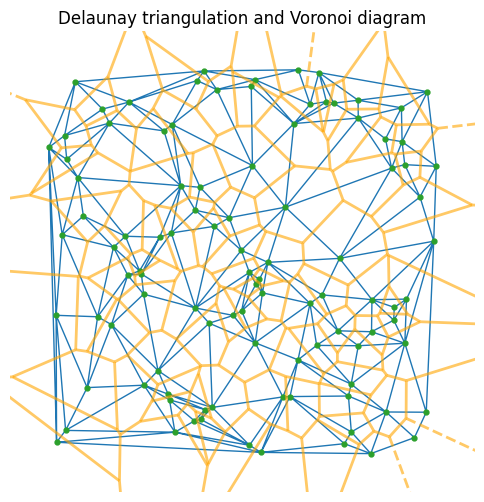

In [143]:
# Plot both the triangulation and the voronoi diagram
fig, axes = plt.subplots(1, 1, figsize=(6, 6))
axes.triplot([p.x for p in P], [p.y for p in P], tri.simplices, linewidth=1)
voronoi_plot_2d(vor, ax=axes, show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6, point_size=7)
axes.axis('off')
axes.set_aspect('equal')
axes.set_title('Delaunay triangulation and Voronoi diagram')

plt.show()

Το **διάγραμμα Voronoi** έχει το πολύ $O(n)$ περιοχές. Ο συνολικός αριθμός ακμών και κορυφών του είναι της τάξης $O(n)$. Η κατασκευή του μπορεί να γίνει σε χρόνο $O(n \log n)$. 

Η **τριγωνοποίηση Delaunay** έχει το πολύ $O(n)$ τρίγωνα. Ο συνολικός αριθμός των ακμών της είναι της τάξης $O(n)$ και η κατασκευή της μπορεί να γίνει σε χρόνο $O(n \log n)$ με τη χρήση του αλγορίθμου **Διαίρει και Βασίλευε** (Devide and Conquer) ή του αλγορίθμου **παραμετρικής σάρωσης** (Fortune's Sweep). Σε ειδικές περιπτώσεις ο χρόνος κατασκευής μπορεί να αυξηθεί και είναι της τάξης $O(n^2)$. Αυτή είναι η χείριστη περίπτωση κατασκευής.

Η πολυπλοκότητες στους αλγορίθμους κατασκευής φαίνονται αναλυτικά στον παρακάτω πίνακα:

<div align="center">

| Αλγόριθμος | Πολυπλοκότητα |
| :---: | :---: |
| Ανύψωση ΚΠ3, Προβολή κάτω περιβλήματος | $O(n \log n)$ |
| Αυξητικός Αλγόριθμος | $O(n \log n)$, $O(n^2)$ (χείριστη περίπτωση) |
| Διάγραμμα Voronoi (Fortune's Sweep) | $O(n \log n)$ |
| Διαίρει και Βασίλευε (Devide & Conquer) | $O(n \log n)$ |

</div>

Το πλήθος $n$ έχει διαφορετική επίδραση στην πολυπλοκότητα των αλγορίθμων ανάλογα με την τιμή του. Για μικρές τιμές του $n$ η διαφορά στους χρόνους κατασκευής δεν είναι τόσο αισθητή. Για μεγάλες τιμές του $n$ η πολυπλοκότητα $O(n \log n)$ είναι αποδοτική αλλά σε χείριστη περίπτωση η πολυπλοκότητα $O(n^2)$ καθιστά την κατασκευή πολύ αργή και η διαφορά στους χρόνους γίνεται αρκετά αισθητή.